[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/crunchdao/adialab-notebooks/blob/main/advanced_modelling_analysis.ipynb)

# 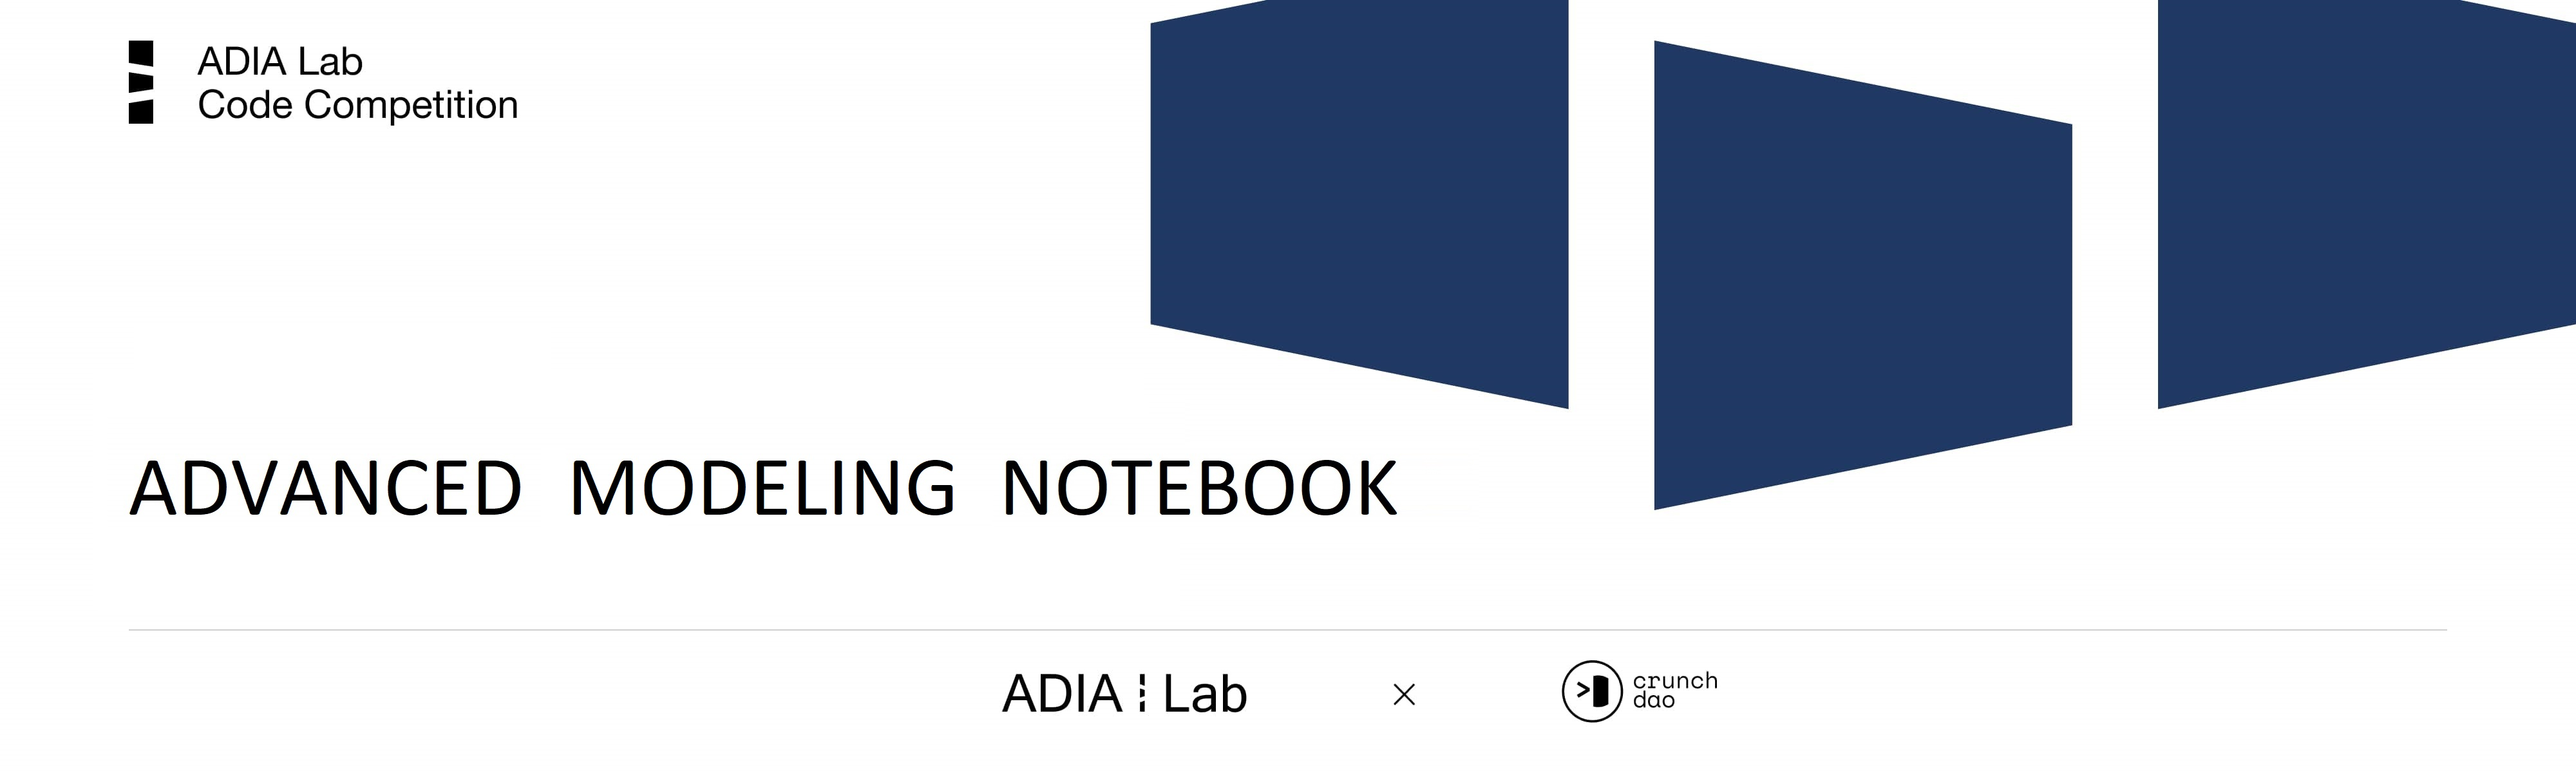

## ADIA Lab Market Prediction Competition - Tutorial Notebook 2

 This notebook can be viewed as a continuation of the [first tutorial notebook](https://github.com/crunchdao/adialab-notebooks/blob/main/advanced_exploratory_data_analysis.ipynb), where we now seek to explore the performance of a non-linear model, Light Gradient Boosting Model (LGBM), of our already prepared dataset. Similarly, the goal of this notebook is both to introduce the competitors to the exercise, as well as to suggest some directions that could be good starting points. Sugesstions here depicted are of course not a requirement and arbitrarily different directions can be pursued

### Preliminary step

In [ ]:
!pip3 install crunch-cli --upgrade

In [ ]:
# import and instantiante the crunch package in this notebook
import crunch
crunch = crunch.load_notebook(__name__)

In [ ]:
%pip install crunch-cli --upgrade
!crunch --notebook setup resonant-poincare --token 8JOXos9WxbgwY3VpkC6vlYohkUvFUKMJwdokdZT9SbSdOW5VeeMMQiYFpI2FxXM3
%cd attractive-pablo

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import snappy
import fastparquet
warnings.filterwarnings("ignore") #This is not advised in general, but it is used in this notebook to clean the presentation of results

Let us now load the data

In [ ]:
X_train, y_train, X_test = crunch.load_data()

In [19]:
X_train

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
0,0,dae29c8061b3176b9208f26afbb96e2ca50886db41902d...,-0.909515,0.388808,-1.535913,-0.133312,-1.826404,-0.532795,0.351273,0.158866,...,-0.731349,-0.456020,-0.257331,0.396074,0.318007,-0.538754,-0.625193,-0.753419,0.154403,1.069385
1,0,2f71f1b5d49fbd131351df95848dc91ab14662af62d4d0...,-0.107694,-0.097967,-0.539599,-0.331276,-0.942609,-0.054123,-1.212772,1.688034,...,0.610428,-0.984907,-0.429806,0.199055,0.202587,1.612578,0.302153,-0.165713,0.905807,0.083180
2,0,b8d41ef950b69f94c380410f59f47e15666c57b74573b6...,0.092316,0.052596,-0.652025,1.218241,0.382968,-0.861838,-0.318937,-0.744261,...,0.212365,-0.046016,1.147463,0.696961,-0.574426,1.255969,0.270394,1.272939,-0.643112,0.433585
3,0,cdce060d04ce28a551eaab653cc4b01f5ad878aeb932ec...,4.119639,1.018918,3.687519,1.597563,0.055918,-1.406041,0.652994,0.251138,...,1.254787,-1.155922,-1.108540,-2.046100,1.311100,-0.322965,0.999248,-1.238640,0.882844,-1.333590
4,0,86f6e6d9407ad3abfab91a3bbfb7ad71553e3f968765b8...,0.109644,-0.290280,-0.278987,-0.603259,0.136952,-1.725076,-0.062219,-0.183102,...,-2.007721,-0.482311,-0.269142,-0.899796,1.083332,0.674665,-1.095657,-0.402669,0.677189,0.319992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742665,268,5a18ddc0f252fa17cbd2a5bfe2f3786c0afb5052dd92be...,0.790984,1.560877,-0.328996,-0.190068,0.314971,-0.001609,0.313957,-0.315743,...,-1.450422,-1.044100,0.631455,-1.322626,-0.407846,0.578026,0.830650,1.414314,-0.845734,0.399335
742666,268,73c197cf1cb75641710562fe26d4f562c8228847a67949...,-1.129492,0.696247,-1.494771,-0.404022,0.909996,-0.658659,0.688591,1.634416,...,-0.475011,0.319023,-1.038112,0.222924,0.804017,-0.969177,-1.011879,-0.921781,-0.067543,0.491890
742667,268,bad7ff9ebc5579589e5ef36cb58f962c90c864fd3dfb22...,1.656413,-1.267060,0.748902,-0.196263,0.831206,-1.590837,3.079856,0.498583,...,-0.010330,-0.426130,-0.624393,-0.236483,-0.244052,1.280749,-2.001158,-1.036838,-1.959235,-2.534523
742668,268,5b968ca44ac0550be6f31470a96e572cd1c58d36cc26c7...,0.282704,0.156104,-1.165022,0.513334,-1.111948,-1.368465,-1.347184,-0.926533,...,0.411093,0.225324,-0.112838,-0.366831,-0.385833,-0.301606,0.395659,-0.895311,-0.819201,-0.996246


In this notebook, we complete 2 tasks in order to improve the performance of Lgbm with respect to our tutorial notebook:
1. We define a custom loss that aligns better than MSE with our optimization needs, and equip Lgbm with it
2. We use an optimization framework called optuna to perform hyperparameter search
3. We find a solution that is competitive with the linear model exploration of the first tutorial notebook

For a new loss function to be defined, we are required to provide the values of the gradient and the hessian as outputs. This clearly implies the need for a differentiable loss function.
In our case, Spearman's rank correlation is not a differentiable function (although some implementations exist, but are beyong the scope of this notebook). However, we can try to tackle this problem using at least 2 different approaches:

1. Find a direct differentiable approximation of the loss.
2. Find the a loss function that is as similar as possible to our desired rank correlation, or has desirable properties that position it as better suited than MSE.

In this notebook we will choose to implement a binary cross entropy based loss function (webince). The rationale is that MSE does not distinguish between the sign of the error, just the distance to it, whereas webince takes the sign information into account, potentially resulting in better correlation scores. In our implementation we can find an expression for its first and second derivate at each sample. Then it can be fed directly into our model

In [20]:
def webince(preds, train_data):
    labels = train_data.get_label()
    labels = (labels + 1)/2
    preds = 1. / (1. + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1. - preds)
    return grad, hess

def SpearmanCorr(y_true, y_pred):
    return pd.Series(y_true).corr(pd.Series(y_pred), method='spearman')


def get_rank_corr_score(y_preds,y_trues):
    rank_pred = y_preds.groupby('date',group_keys=True).apply(lambda x: x.rank(pct=True, method="first"))    
    correlation_score = np.corrcoef(rank_pred['y'],y_trues['y'])[0,1]
    return correlation_score

def lgbm_correlation(preds, train_data):
    labels = train_data.get_label()
    return 'Correlation', SpearmanCorr(labels,preds), True

In [21]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate',0.00001,1)
    lambda_l1 = trial.suggest_float('lambda_l1',0,1)
    lambda_l2 = trial.suggest_float('lambda_l2',0,1)
    num_leaves = trial.suggest_int('num_leaves',2,130)
    feature_fraction = trial.suggest_float('feature_fraction',0,1)
    bagging_fraction = trial.suggest_float('bagging_fraction',0,1)
    min_child_samples = trial.suggest_int('min_child_samples',1,10000)

    param = {'objective': 'none',
         'metric': 'none',
         'learning_rate': learning_rate,
         'lambda_l1': lambda_l1,
         'lambda_l2': lambda_l2,
         'num_leaves': num_leaves,
         'feature_fraction': feature_fraction,
         'bagging_fraction': bagging_fraction,
         'min_child_samples': min_child_samples,
         'verbose':-1}

    lgb_perf = []
    X = np.array(list(range(np.max(X_train['date']))))
    tscv = TimeSeriesSplit(n_splits=10)
    for train, test in tscv.split(X):
        fold_train_X = X_train.loc[np.logical_and(X_train['date'] >= train[0], X_train['date'] <= (train[-3])),:] # 2 dates gap
        fold_train_y = y_train.loc[np.logical_and(y_train['date'] >= train[0], y_train['date'] <= (train[-3])),:]
        fold_test_X = X_train.loc[np.logical_and(X_train['date'] >= test[0], X_train['date'] <= test[-1]),:]
        fold_test_y = y_train.loc[np.logical_and(y_train['date'] >= test[0], y_train['date'] <= test[-1]),:]


        dtrain = lgb.Dataset(fold_train_X.iloc[:,2:], fold_train_y['y'])
        dval = lgb.Dataset(fold_test_X.iloc[:,2:], fold_test_y['y'])
        
        
        clf = lgb.train(param,dtrain,valid_sets=dval,verbose_eval=-1,early_stopping_rounds=100,
                        num_boost_round=2000,fobj=webince,feval=lgbm_correlation)
        preds = clf.predict(fold_test_X.iloc[:,2:])
        preds = pd.DataFrame(preds,columns=['y'])
        preds['date'] = np.array(fold_test_X['date'])
        score = get_rank_corr_score(preds,fold_test_y)  
        lgb_perf.append(score) 
    return np.mean(lgb_perf)    
    

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1)

# N_hours =2 # We ran the study for 2 hours
# study.optimize(objective, timeout=int(3600*(N_hours))) 

In [ ]:
print(study.best_value,'\n') # print parameter values
display(study.best_params)

In [ ]:
optuna.visualization.plot_optimization_history(study) # see a graphical plot of the study optimization trajectory